# CS6220 Final Project

##  <pre>                       Wine Quality Prediction using Classification</pre>

In [87]:

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sb

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import norm 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.svm import SVC

from sklearn import metrics


In [88]:
df=pd.read_csv('winequality-red.csv', sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [90]:
# checking for any null values 
df.isnull().any() 

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

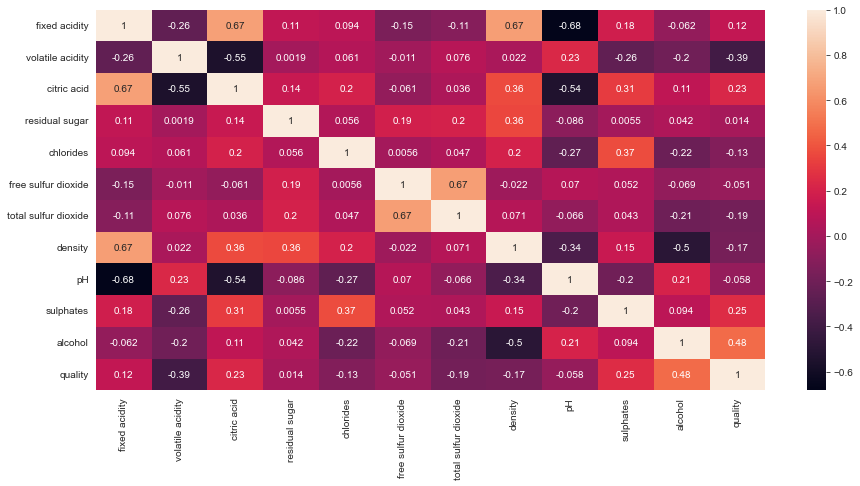

In [91]:
# correlation by visualization
plt.figure(figsize=[15,7])
# plot correlation
sb.heatmap(df.corr(),annot=True)
plt.show()

##  <pre>                      Classification Models </pre>


### RED WINE 


In [92]:

df=pd.read_csv('winequality-red.csv', sep=";")
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [93]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [94]:
# Convert the Regression problem to classification by thresholding the target variable.

Threshold = 6
# if ([df.quality >= Threshold]):
#     df.quality =True
# if ([df.quality < Threshold]):
#     df.quality = False
# df.quality[df.quality >= Threshold] = True
# df[df.quality < Threshold] = False


df['quality'] = np.where(df['quality']< Threshold , False, df['quality'])
df['quality'] = np.where(df['quality'] >= Threshold , True, df['quality'])

df.head(100)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,1
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,0
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,0
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,0


In [95]:
df.isnull().any() 

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

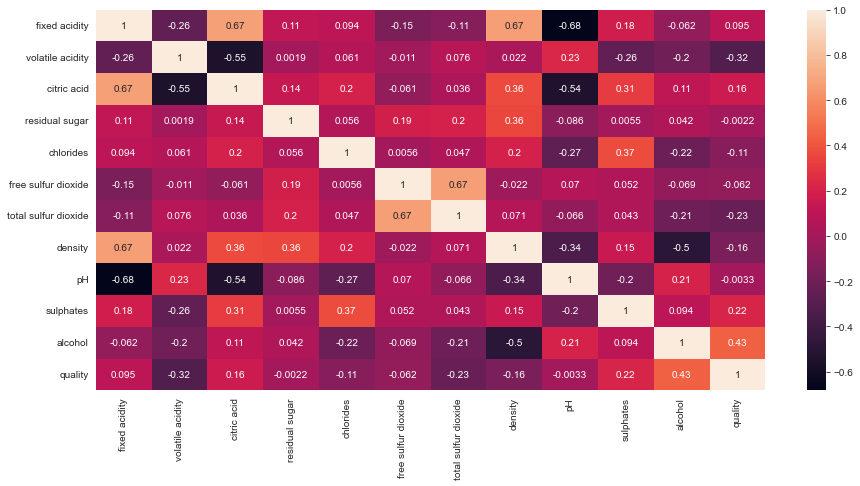

In [96]:
# correlation by visualization
plt.figure(figsize=[15,7])
# plot correlation
sb.heatmap(df.corr(),annot=True)
plt.show()

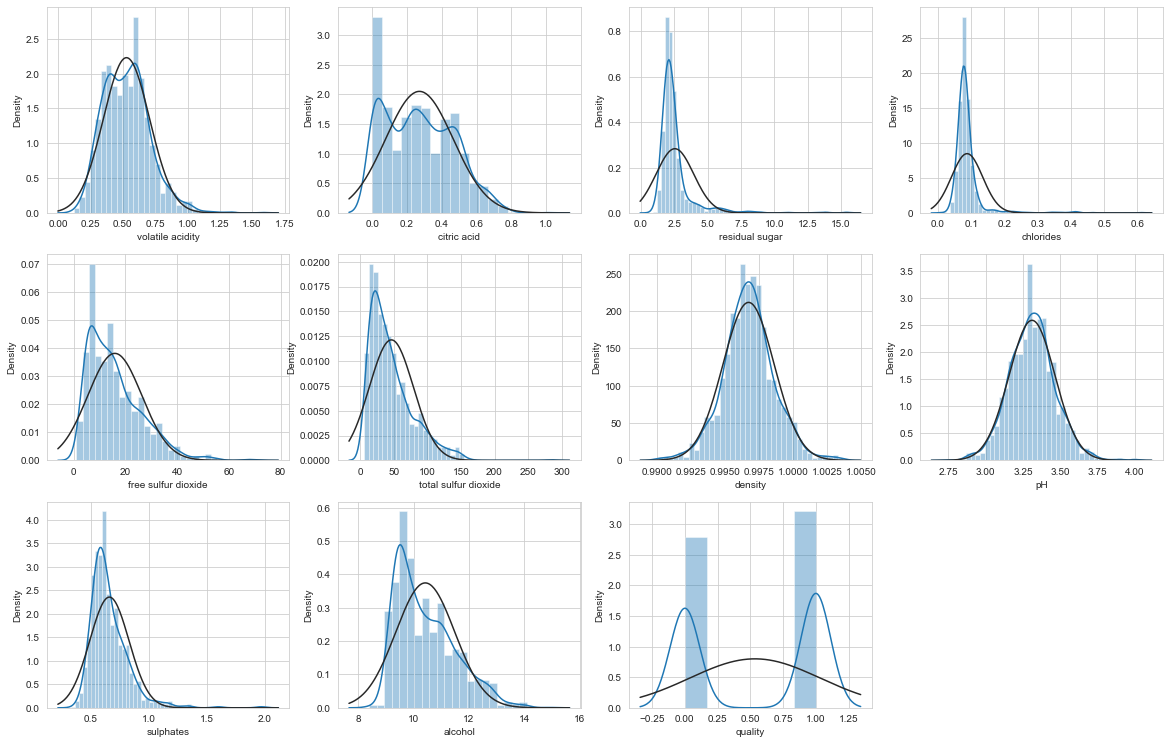

In [97]:
plt.figure(figsize = (20,22))
df_temp =df.copy()
for i in range(1,12):
    plt.subplot(5,4,i)
    sb.distplot(df_temp[df_temp.columns[i]], fit=norm)

### WHITE WINE 


In [98]:
df2=pd.read_csv('winequality-white.csv', sep=";")
df2.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [99]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [100]:
# Convert the Regression problem to classification by thresholding the target variable.

Threshold = 6

df2['quality'] = np.where(df2['quality']< Threshold , False, df2['quality'])
df2['quality'] = np.where(df2['quality'] >= Threshold , True, df2['quality'])

df2.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,1
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,1
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,1
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,0


In [101]:
df2.isnull().any() 

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

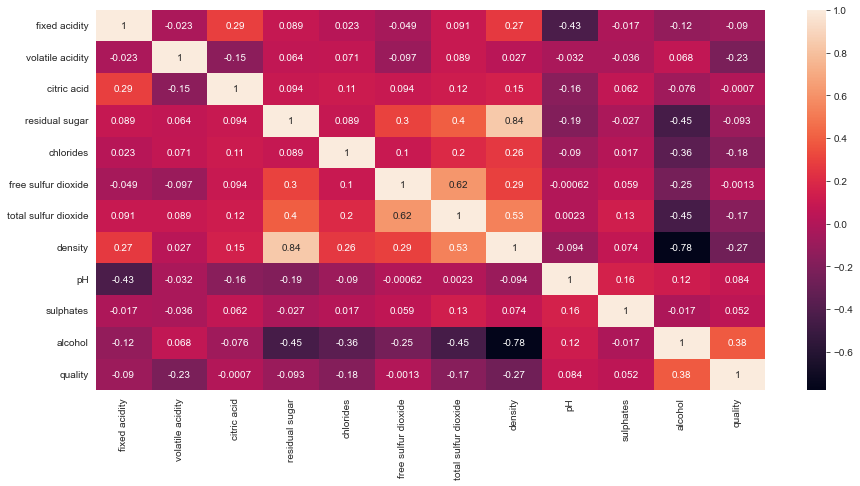

In [102]:
# correlation by visualization
plt.figure(figsize=[15,7])
# plot correlation
sb.heatmap(df2.corr(),annot=True)
plt.show()

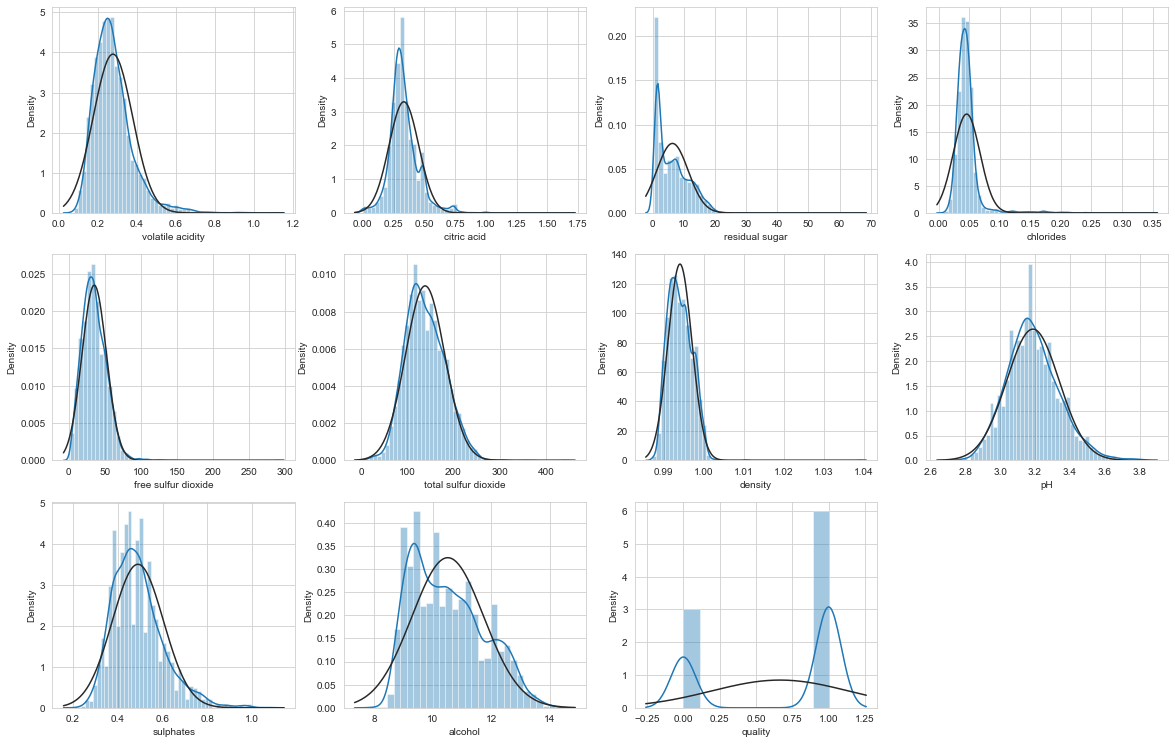

In [103]:
plt.figure(figsize = (20,22))
df2_temp =df2.copy()
for i in range(1,12):
    plt.subplot(5,4,i)
    sb.distplot(df2_temp[df2_temp.columns[i]], fit=norm)

## Logistic Regression

### Logistic Regression On Red Wine:

In [104]:
# df=pd.read_csv('winequality-red.csv', sep=";")
# df.head(20)

X = df.drop(['quality'], axis=1)

y = df['quality']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y, random_state = 30)

In [106]:
lr_r = LogisticRegression(random_state = 30)
lr_r.fit(X_train, y_train)

LogisticRegression(random_state=30)

In [107]:
train_accuracy = lr_r.score(X_train, y_train)
test_accuracy = lr_r.score(X_test, y_test)
print('Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train Group   : 0.75
Accuracy in Test  Group   : 0.74


In [108]:

y_pred = lr_r.predict(X_test)
print("Accuracy of classifer =",metrics.accuracy_score(y_test, y_pred))
print("Precision value for classifer = ",precision_score(y_test, y_pred))
print("Recall value for classifer = ",recall_score(y_test, y_pred))

Accuracy of classifer = 0.74375
Precision value for classifer =  0.7405405405405405
Recall value for classifer =  0.8011695906432749


In [109]:
print("Classification Report for classifer =\n\n ",classification_report(y_test, y_pred))


Classification Report for classifer =

                precision    recall  f1-score   support

           0       0.75      0.68      0.71       149
           1       0.74      0.80      0.77       171

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [110]:
print("Confusion Matrix for classifer = \n")
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Confusion Matrix for classifer = 



Predicted,0,1,All
Actual,,,
0,101,48,149
1,34,137,171
All,135,185,320


ROC curve for classifer = 



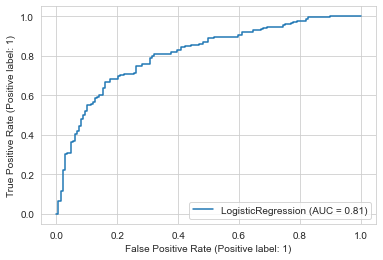

In [111]:
print("ROC curve for classifer = \n")
metrics.plot_roc_curve(lr_r, X_test, y_test) 
false_positive_rate_lr_r,true_positive_rate_lr_r,threshold_lr_r = roc_curve(y_test, y_pred)
plt.show()

A Precision/Recall curve for classifer = 



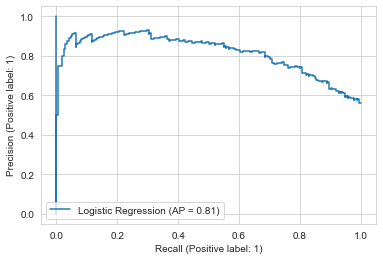

In [112]:
print("A Precision/Recall curve for classifer = \n")

PrecisionRecallDisplay.from_estimator(
    lr_r, X_test, y_test, name="Logistic Regression"
)

### Logistic Regression On White Wine:

In [113]:

X = df2.drop(['quality'], axis=1)

y = df2['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [114]:
lr_w = LogisticRegression(random_state = 30)
lr_w.fit(X_train, y_train)

LogisticRegression(random_state=30)

In [115]:
train_accuracy = lr_w.score(X_train, y_train)
test_accuracy = lr_w.score(X_test, y_test)
print('Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train Group   : 0.74
Accuracy in Test  Group   : 0.74


In [116]:
y_pred = lr_w.predict(X_test)
print("Accuracy of classifer =",metrics.accuracy_score(y_test, y_pred))
print("Precision value for classifer = ",precision_score(y_test, y_pred))
print("Recall value for classifer = ",recall_score(y_test, y_pred))

Accuracy of classifer = 0.7397959183673469
Precision value for classifer =  0.7774762550881954
Recall value for classifer =  0.8629518072289156


In [117]:
print("Classification Report for classifer =\n\n ",classification_report(y_test, y_pred))


Classification Report for classifer =

                precision    recall  f1-score   support

           0       0.63      0.48      0.54       316
           1       0.78      0.86      0.82       664

    accuracy                           0.74       980
   macro avg       0.70      0.67      0.68       980
weighted avg       0.73      0.74      0.73       980



In [118]:
print("Confusion Matrix for classifer = \n")
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Confusion Matrix for classifer = 



Predicted,0,1,All
Actual,,,
0,152,164,316
1,91,573,664
All,243,737,980


ROC curve for classifer = 



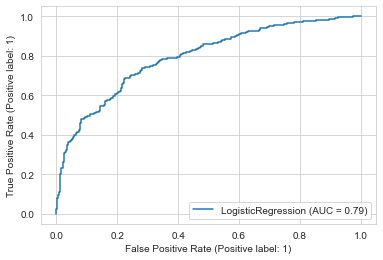

In [119]:
print("ROC curve for classifer = \n")
metrics.plot_roc_curve(lr_w, X_test, y_test) 
false_positive_rate_lr_w,true_positive_rate_lr_w,threshold_lr_w = roc_curve(y_test, y_pred)

plt.show()

A Precision/Recall curve for classifer = 



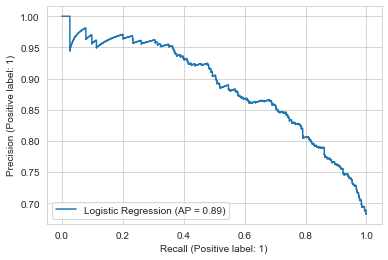

In [120]:
print("A Precision/Recall curve for classifer = \n")

PrecisionRecallDisplay.from_estimator(
    lr_w, X_test, y_test, name="Logistic Regression"
)

### Random Forest Classification

### Random Forest Classification on Red Wine data

In [121]:
#df corresponds to dataframe holding red wine data
# df2 corresponds to dataframe holding white wine data

X = df.drop(columns = 'quality')
y = df['quality']


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =40)
clf_red= RandomForestClassifier(n_estimators=75, random_state =40)
clf_red.fit(X_train,y_train)

RandomForestClassifier(n_estimators=75, random_state=40)

In [123]:
y_pred = clf_red.predict(X_test)
print('Accuracy of Random Forest Classifier : ', metrics.accuracy_score(y_test,y_pred))


Accuracy of Random Forest Classifier :  0.853125


In [124]:
print("Precision value for classifer = ",precision_score(y_test, y_pred))
print("Recall value for classifer = ",recall_score(y_test, y_pred))
print("Classification Report for classifer =\n\n ",classification_report(y_test, y_pred))


Precision value for classifer =  0.8662790697674418
Recall value for classifer =  0.861271676300578
Classification Report for classifer =

                precision    recall  f1-score   support

           0       0.84      0.84      0.84       147
           1       0.87      0.86      0.86       173

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



In [125]:
print("Confusion Matrix for classifer = \n")
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Confusion Matrix for classifer = 



Predicted,0,1,All
Actual,,,
0,124,23,147
1,24,149,173
All,148,172,320


ROC curve for classifer = 



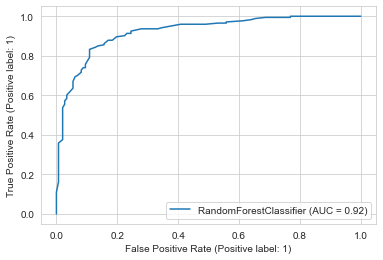

In [126]:
print("ROC curve for classifer = \n")
metrics.plot_roc_curve(clf_red, X_test, y_test) 
false_positive_rate_rf_r,true_positive_rate_rf_r,threshold_rf_r = roc_curve(y_test, y_pred)

plt.show()

A Precision/Recall curve for classifer = 



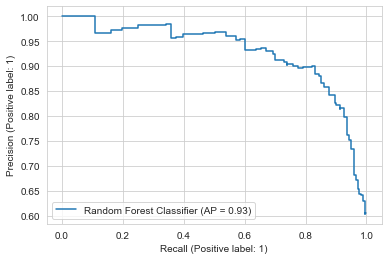

In [127]:
print("A Precision/Recall curve for classifer = \n")

PrecisionRecallDisplay.from_estimator(
    clf_red, X_test, y_test, name="Random Forest Classifier"
)

### Random Forest Classification on White Wine data

In [128]:
#df corresponds to dataframe holding red wine data
# df2 corresponds to dataframe holding white wine data

X = df2.drop(columns = 'quality')
y = df2['quality']


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =40)
clf_w= RandomForestClassifier(n_estimators=75, random_state =40)
clf_w.fit(X_train,y_train)

RandomForestClassifier(n_estimators=75, random_state=40)

In [130]:
y_pred = clf_w.predict(X_test)
print('Accuracy of Random Forest Classifier : ', metrics.accuracy_score(y_test,y_pred))
print("Precision value for classifer = ",precision_score(y_test, y_pred))
print("Recall value for classifer = ",recall_score(y_test, y_pred))
print("Classification Report for classifer =\n\n ",classification_report(y_test, y_pred))


Accuracy of Random Forest Classifier :  0.826530612244898
Precision value for classifer =  0.8488372093023255
Recall value for classifer =  0.8984615384615384
Classification Report for classifer =

                precision    recall  f1-score   support

           0       0.77      0.68      0.73       330
           1       0.85      0.90      0.87       650

    accuracy                           0.83       980
   macro avg       0.81      0.79      0.80       980
weighted avg       0.82      0.83      0.82       980



In [131]:
print("Confusion Matrix for classifer = \n")
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Confusion Matrix for classifer = 



Predicted,0,1,All
Actual,,,
0,226,104,330
1,66,584,650
All,292,688,980


ROC curve for classifer = 



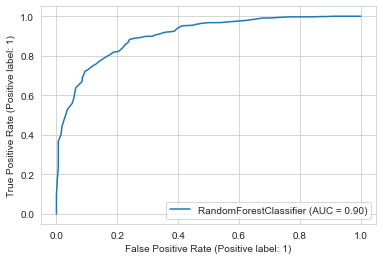

In [132]:
print("ROC curve for classifer = \n")
metrics.plot_roc_curve(clf_w, X_test, y_test) 
false_positive_rate_rf_w,true_positive_rate_rf_w,threshold_rf_w = roc_curve(y_test, y_pred)

plt.show()

A Precision/Recall curve for classifer = 



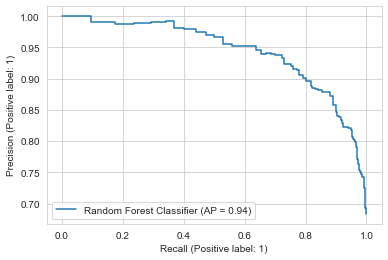

In [133]:
print("A Precision/Recall curve for classifer = \n")

PrecisionRecallDisplay.from_estimator(
    clf_w, X_test, y_test, name="Random Forest Classifier"
)

### Naive Bayes Classification

### Naive Bayes Classification on Red Wine 

In [134]:
X = df.drop(columns = 'quality')
y = df['quality']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =40)
nb_r = GaussianNB()
nb_r.fit(X_train, y_train)


GaussianNB()

In [135]:
y_pred = nb_r.predict(X_test)
print('Accuracy of Classifier : ', metrics.accuracy_score(y_test,y_pred))
print("Precision value for classifer = ",precision_score(y_test, y_pred))
print("Recall value for classifer = ",recall_score(y_test, y_pred))
print("Classification Report for classifer =\n\n ",classification_report(y_test, y_pred))


Accuracy of Classifier :  0.746875
Precision value for classifer =  0.7613636363636364
Recall value for classifer =  0.7745664739884393
Classification Report for classifer =

                precision    recall  f1-score   support

           0       0.73      0.71      0.72       147
           1       0.76      0.77      0.77       173

    accuracy                           0.75       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.75      0.75      0.75       320



In [136]:
print("Confusion Matrix for classifer = \n")
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Confusion Matrix for classifer = 



Predicted,0,1,All
Actual,,,
0,105,42,147
1,39,134,173
All,144,176,320


ROC curve for classifer = 



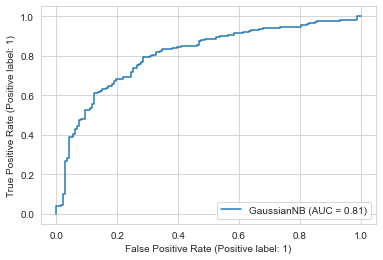

In [137]:
print("ROC curve for classifer = \n")
metrics.plot_roc_curve(nb_r, X_test, y_test) 
false_positive_rate_nb_r,true_positive_rate_nb_r,threshold_nb_r = roc_curve(y_test, y_pred)

plt.show()

A Precision/Recall curve for classifer = 



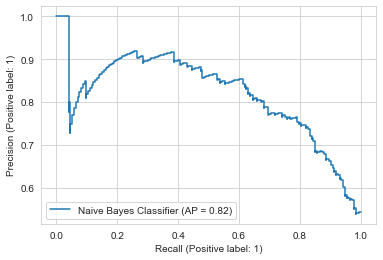

In [138]:
print("A Precision/Recall curve for classifer = \n")

PrecisionRecallDisplay.from_estimator(
    nb_r, X_test, y_test, name="Naive Bayes Classifier"
)

### Naive Bayes Classification on White Wine

In [139]:
X = df2.drop(columns = 'quality')
y = df2['quality']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =40)
nb_w = GaussianNB()
nb_w.fit(X_train, y_train)

GaussianNB()

In [140]:
y_pred = nb_w.predict(X_test)
print('Accuracy of Classifier : ', metrics.accuracy_score(y_test,y_pred))
print("Precision value for classifer = ",precision_score(y_test, y_pred))
print("Recall value for classifer = ",recall_score(y_test, y_pred))
print("Classification Report for classifer =\n\n ",classification_report(y_test, y_pred))


Accuracy of Classifier :  0.7081632653061225
Precision value for classifer =  0.78
Recall value for classifer =  0.78
Classification Report for classifer =

                precision    recall  f1-score   support

           0       0.57      0.57      0.57       330
           1       0.78      0.78      0.78       650

    accuracy                           0.71       980
   macro avg       0.67      0.67      0.67       980
weighted avg       0.71      0.71      0.71       980



In [141]:
print("Confusion Matrix for classifer = \n")
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Confusion Matrix for classifer = 



Predicted,0,1,All
Actual,,,
0,187,143,330
1,143,507,650
All,330,650,980


ROC curve for classifer = 



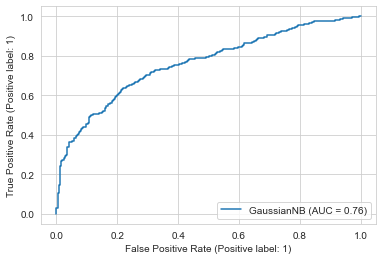

In [142]:
print("ROC curve for classifer = \n")
metrics.plot_roc_curve(nb_w, X_test, y_test) 
false_positive_rate_nb_w,true_positive_rate_nb_w,threshold_nb_w = roc_curve(y_test, y_pred)

plt.show()

A Precision/Recall curve for classifer = 



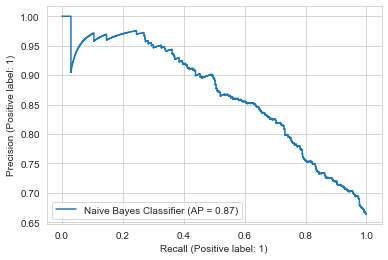

In [143]:
print("A Precision/Recall curve for classifer = \n")

PrecisionRecallDisplay.from_estimator(
    nb_w, X_test, y_test, name="Naive Bayes Classifier"
)

### Classification using SVM 

### Classification using SVM on Red Wine

In [144]:
X = df.drop(columns = 'quality')
y = df['quality']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =40)

svc_r = SVC() #random_state=40



In [145]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {"C": [0.001,0.01,0.1,1,10,100,1000]}
svc_random = RandomizedSearchCV(svc_r,random_grid,cv=5,random_state=2020)
svc_random.fit(X_train, y_train)
print(svc_random.best_params_)

{'C': 1000}


In [146]:
svc_r = SVC(C=1000) #random_state=40
svc_r.fit(X_train, y_train)

SVC(C=1000)

In [147]:
y_pred = svc_r.predict(X_test)
print('Accuracy of Classifier : ', metrics.accuracy_score(y_test,y_pred))
print("Precision value for classifer = ",precision_score(y_test, y_pred))
print("Recall value for classifer = ",recall_score(y_test, y_pred))
print("Classification Report for classifer =\n\n ",classification_report(y_test, y_pred))


Accuracy of Classifier :  0.784375
Precision value for classifer =  0.8170731707317073
Recall value for classifer =  0.7745664739884393
Classification Report for classifer =

                precision    recall  f1-score   support

           0       0.75      0.80      0.77       147
           1       0.82      0.77      0.80       173

    accuracy                           0.78       320
   macro avg       0.78      0.79      0.78       320
weighted avg       0.79      0.78      0.78       320



In [148]:
print("Confusion Matrix for classifer = \n")
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Confusion Matrix for classifer = 



Predicted,0,1,All
Actual,,,
0,117,30,147
1,39,134,173
All,156,164,320


ROC curve for classifer = 



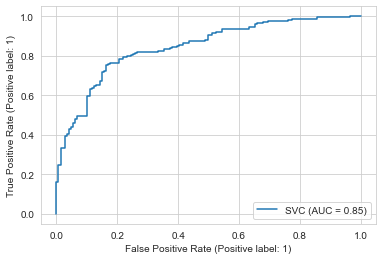

In [149]:
print("ROC curve for classifer = \n")
metrics.plot_roc_curve(svc_r, X_test, y_test) 
false_positive_rate_svm_r,true_positive_rate_svm_r,threshold_svm_r = roc_curve(y_test, y_pred)

plt.show()

A Precision/Recall curve for classifer = 



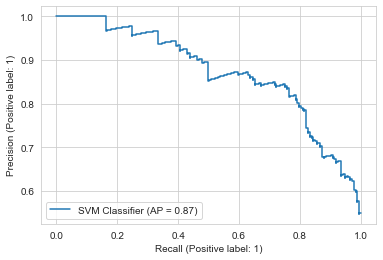

In [150]:
print("A Precision/Recall curve for classifer = \n")

PrecisionRecallDisplay.from_estimator(
    svc_r, X_test, y_test, name="SVM Classifier"
)

### Classification using SVM on White Wine

In [151]:
X = df2.drop(columns = 'quality')
y = df2['quality']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =40)

svc_w = SVC() #random_state=40)
# svc_w.fit(X_train, y_train)


In [152]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {"C": [0.001,0.01,0.1,1,10,100,1000]}
svc_random = RandomizedSearchCV(svc_w,random_grid,cv=5,random_state=2020)
svc_random.fit(X_train, y_train)
print(svc_random.best_params_)

{'C': 1000}


In [153]:
svc_w = SVC(C=1000) #random_state=40
svc_w.fit(X_train, y_train)

SVC(C=1000)

In [154]:
y_pred = svc_w.predict(X_test)
print('Accuracy of Classifier : ', metrics.accuracy_score(y_test,y_pred))
print("Precision value for classifer = ",precision_score(y_test, y_pred))
print("Recall value for classifer = ",recall_score(y_test, y_pred))
print("Classification Report for classifer =\n\n ",classification_report(y_test, y_pred))


Accuracy of Classifier :  0.7704081632653061
Precision value for classifer =  0.7906976744186046
Recall value for classifer =  0.8892307692307693
Classification Report for classifer =

                precision    recall  f1-score   support

           0       0.71      0.54      0.61       330
           1       0.79      0.89      0.84       650

    accuracy                           0.77       980
   macro avg       0.75      0.71      0.72       980
weighted avg       0.76      0.77      0.76       980



In [155]:
print("Confusion Matrix for classifer = \n")
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Confusion Matrix for classifer = 



Predicted,0,1,All
Actual,,,
0,177,153,330
1,72,578,650
All,249,731,980


ROC curve for classifer = 



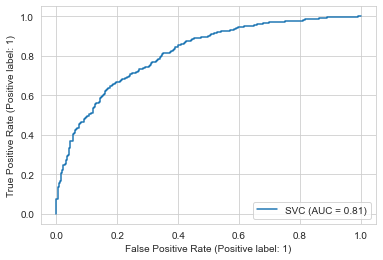

In [156]:
print("ROC curve for classifer = \n")
metrics.plot_roc_curve(svc_w, X_test, y_test) 
false_positive_rate_svm_w,true_positive_rate_svm_w,threshold_svm_w = roc_curve(y_test, y_pred)

plt.show()

A Precision/Recall curve for classifer = 



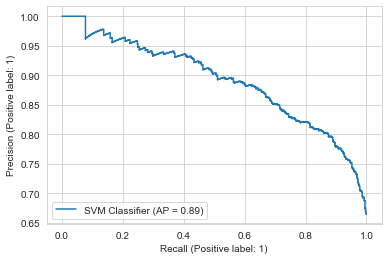

In [157]:
print("A Precision/Recall curve for classifer = \n")

PrecisionRecallDisplay.from_estimator(
    svc_w, X_test, y_test, name="SVM Classifier"
)

### Classification using KNN

### Classification using KNN on Red Wine

In [158]:
X = df.drop(columns = 'quality')
y = df['quality']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =40)





Text(0, 0.5, 'Mean Error')

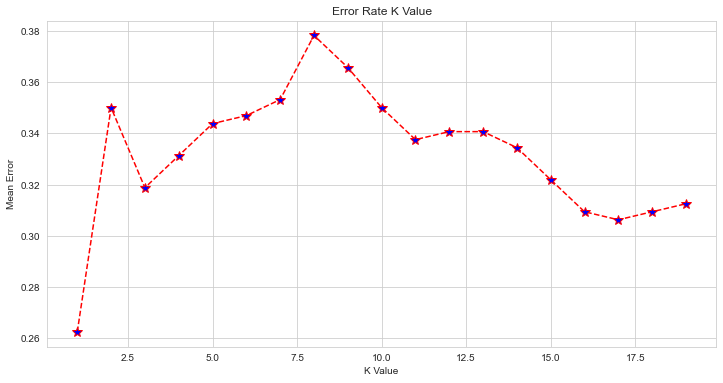

In [159]:
Mean_error= []
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_knn_i = knn.predict(X_test)
    Mean_error.append(np.mean(pred_knn_i != y_test))

    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), Mean_error, color='red', linestyle='dashed', marker='*',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [160]:
knn_r = KNeighborsClassifier(n_neighbors=1)
knn_r.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [161]:
y_pred = knn_r.predict(X_test)
print('Accuracy of Classifier : ', metrics.accuracy_score(y_test,y_pred))
print("Precision value for classifer = ",precision_score(y_test, y_pred))
print("Recall value for classifer = ",recall_score(y_test, y_pred))
print("Classification Report for classifer =\n\n ",classification_report(y_test, y_pred))


Accuracy of Classifier :  0.7375
Precision value for classifer =  0.7664670658682635
Recall value for classifer =  0.7398843930635838
Classification Report for classifer =

                precision    recall  f1-score   support

           0       0.71      0.73      0.72       147
           1       0.77      0.74      0.75       173

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [162]:
print("Confusion Matrix for classifer = \n")
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Confusion Matrix for classifer = 



Predicted,0,1,All
Actual,,,
0,108,39,147
1,45,128,173
All,153,167,320


ROC curve for classifer = 



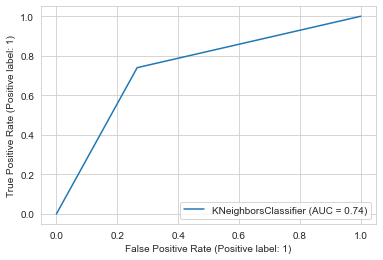

In [163]:
print("ROC curve for classifer = \n")
metrics.plot_roc_curve(knn_r, X_test, y_test) 
false_positive_rate_knn_r,true_positive_rate_knn_r,threshold_knn_r = roc_curve(y_test, y_pred)

plt.show()

A Precision/Recall curve for classifer = 



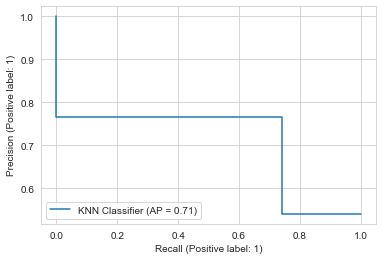

In [164]:
print("A Precision/Recall curve for classifer = \n")

PrecisionRecallDisplay.from_estimator(
    knn_r, X_test, y_test, name="KNN Classifier"
)

### Classification using KNN on White Wine

In [165]:
X = df2.drop(columns = 'quality')
y = df2['quality']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =40)




Text(0, 0.5, 'Mean Error')

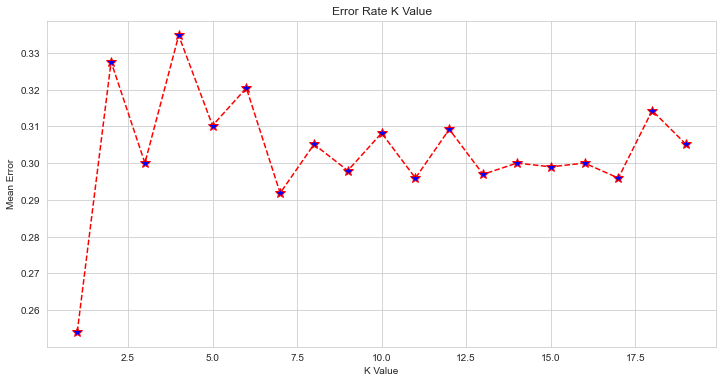

In [166]:
Mean_error= []
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_knn_i = knn.predict(X_test)
    Mean_error.append(np.mean(pred_knn_i != y_test))

    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), Mean_error, color='red', linestyle='dashed', marker='*',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [167]:
knn_w = KNeighborsClassifier(n_neighbors=1)
knn_w.fit(X_train, y_train)

y_pred = knn_w.predict(X_test)
print('Accuracy of Classifier : ', metrics.accuracy_score(y_test,y_pred))
print("Precision value for classifer = ",precision_score(y_test, y_pred))
print("Recall value for classifer = ",recall_score(y_test, y_pred))
print("Classification Report for classifer =\n\n ",classification_report(y_test, y_pred))


Accuracy of Classifier :  0.7459183673469387
Precision value for classifer =  0.7997010463378177
Recall value for classifer =  0.823076923076923
Classification Report for classifer =

                precision    recall  f1-score   support

           0       0.63      0.59      0.61       330
           1       0.80      0.82      0.81       650

    accuracy                           0.75       980
   macro avg       0.71      0.71      0.71       980
weighted avg       0.74      0.75      0.74       980



In [168]:
print("Confusion Matrix for classifer = \n")
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Confusion Matrix for classifer = 



Predicted,0,1,All
Actual,,,
0,196,134,330
1,115,535,650
All,311,669,980


ROC curve for classifer = 



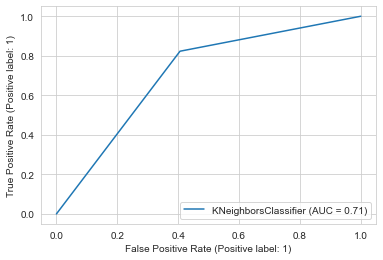

In [169]:
print("ROC curve for classifer = \n")
metrics.plot_roc_curve(knn_w, X_test, y_test) 
false_positive_rate_knn_w,true_positive_rate_knn_w,threshold_knn_w = roc_curve(y_test, y_pred)

plt.show()

A Precision/Recall curve for classifer = 



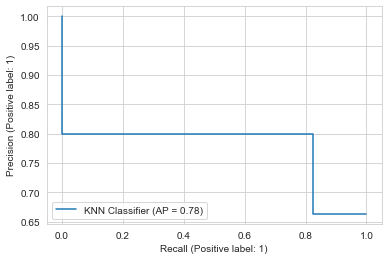

In [170]:
print("A Precision/Recall curve for classifer = \n")

PrecisionRecallDisplay.from_estimator(
    knn_w, X_test, y_test, name="KNN Classifier"
)

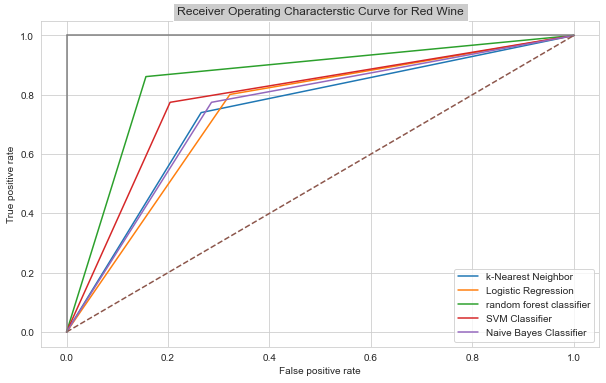

In [171]:
#Comparing ROC curves of all the above classifiers for red wine:

#Plot ROC Curve
sb.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic Curve for Red Wine', bbox={'facecolor':'0.8'})
plt.plot(false_positive_rate_knn_r,true_positive_rate_knn_r,label='k-Nearest Neighbor')
plt.plot(false_positive_rate_lr_r,true_positive_rate_lr_r,label='Logistic Regression')
plt.plot(false_positive_rate_rf_r,true_positive_rate_rf_r,label='random forest classifier')
plt.plot(false_positive_rate_svm_r,true_positive_rate_svm_r,label='SVM Classifier')
plt.plot(false_positive_rate_nb_r,true_positive_rate_nb_r,label='Naive Bayes Classifier')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()


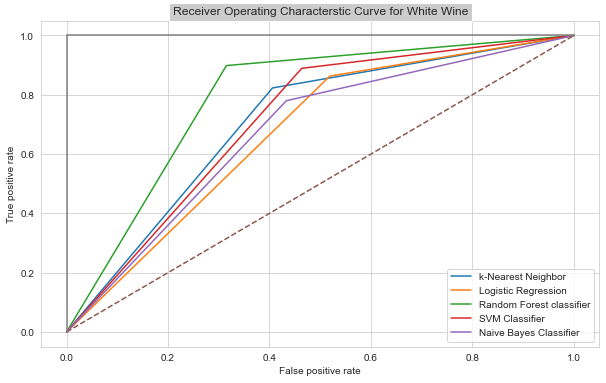

In [172]:
#Comparing ROC curves of all the above classifiers for white wine:

#Plot ROC Curve
sb.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic Curve for White Wine', bbox={'facecolor':'0.8'})
plt.plot(false_positive_rate_knn_w,true_positive_rate_knn_w,label='k-Nearest Neighbor')
plt.plot(false_positive_rate_lr_w,true_positive_rate_lr_w,label='Logistic Regression')
plt.plot(false_positive_rate_rf_w,true_positive_rate_rf_w,label='Random Forest classifier')
plt.plot(false_positive_rate_svm_w,true_positive_rate_svm_w,label='SVM Classifier')
plt.plot(false_positive_rate_nb_w,true_positive_rate_nb_w,label='Naive Bayes Classifier')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()


In [ ]:
sb.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Area Under Curves for Red Wine', bbox={'facecolor':'0.8'})




